### IBM Coursera Capstone Project

This Notebook will be mainly used for the capstone project of the IBM Data Science Course from Coursera

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score

In [5]:
#get the data
df_raw = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#only select relevant columns
df = df_raw[["SEVERITYCODE","PERSONCOUNT","VEHCOUNT","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]]

In [20]:
df.shape

(194673, 7)

In [29]:
#as dataset is way bigger than number of na's we are just going to drop all rows with nA
df = df.dropna()
df.isna().sum().sum()

0

As we can see, no na values are left in the dataset

In [36]:
#Now we are checking for unique values for each column in order to get a better overview over the data
print(df["PERSONCOUNT"].unique(),df["VEHCOUNT"].unique(),df["JUNCTIONTYPE"].unique(),df["WEATHER"].unique(),df["ROADCOND"].unique(),df["LIGHTCOND"].unique(),sep="\n\n")

[ 2  4  3  0  5  1  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]

[ 2  3  1  4  0  7  5  6  8 11  9 10 12]

['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


#### *We can see that the Weather, Roadcondition and Lightcondition columns contain values marked as "Unknown" and "other". As those values are not adding any information, we are going to drop the corresponding rows!*

In [37]:
a = ["Other","Unknown"]
df = df[~df['WEATHER'].isin(a)]
df = df[~df['ROADCOND'].isin(a)]
df = df[~df['LIGHTCOND'].isin(a)]

In [38]:
#Now we are checking if the rows were succesfully dropped
print(df["WEATHER"].unique(),df["ROADCOND"].unique(),df["LIGHTCOND"].unique(),sep="\n\n")

['Overcast' 'Raining' 'Clear' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Sand/Mud/Dirt' 'Standing Water' 'Oil']

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Dark - Unknown Lighting']


In [39]:
df_grouped = df.groupby(by="SEVERITYCODE")

In [43]:
df_grouped["WEATHER"].value_counts(normalize=True)

SEVERITYCODE  WEATHER                 
1             Clear                       0.640477
              Raining                     0.189309
              Overcast                    0.160066
              Snowing                     0.005797
              Fog/Smog/Smoke              0.003202
              Sleet/Hail/Freezing Rain    0.000705
              Blowing Sand/Dirt           0.000268
              Severe Crosswind            0.000161
              Partly Cloudy               0.000018
2             Clear                       0.639230
              Raining                     0.198804
              Overcast                    0.154848
              Fog/Smog/Smoke              0.003306
              Snowing                     0.002927
              Sleet/Hail/Freezing Rain    0.000488
              Blowing Sand/Dirt           0.000217
              Severe Crosswind            0.000126
              Partly Cloudy               0.000054
Name: WEATHER, dtype: float64

In [44]:
df_sev1= df[df["SEVERITYCODE"]==1]
df_sev2 = df[df["SEVERITYCODE"]==2]

In [48]:
df_sev1["WEATHER"].value_counts()

Clear                       71816
Raining                     21227
Overcast                    17948
Snowing                       650
Fog/Smog/Smoke                359
Sleet/Hail/Freezing Rain       79
Blowing Sand/Dirt              30
Severe Crosswind               18
Partly Cloudy                   2
Name: WEATHER, dtype: int64

Text(0.0, 1.0, 'Lightcondition for Severitycode=2')

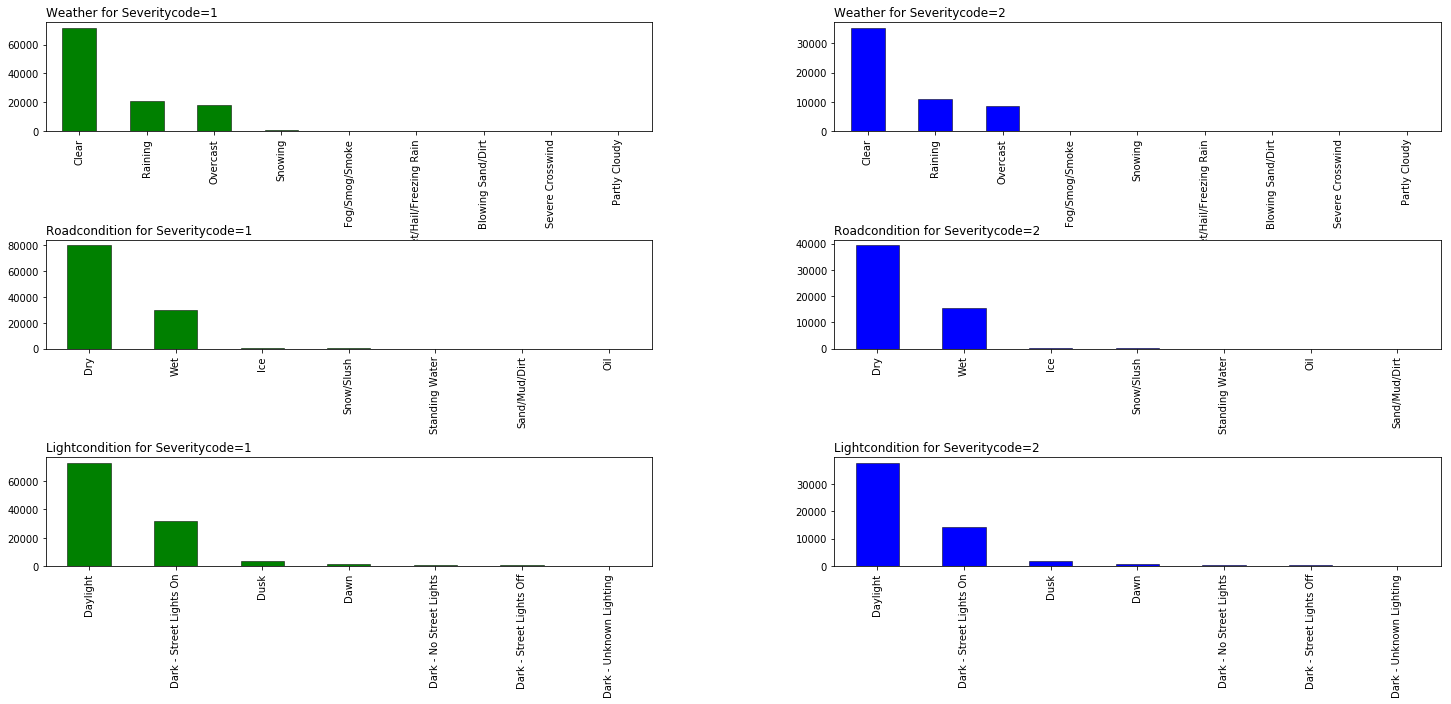

In [65]:
fig = plt.figure(figsize=(25,10))
plt.subplots_adjust(wspace=0.3,hspace=1.)
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)
df_sev1["WEATHER"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='g',ax=ax0)
df_sev2["WEATHER"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='b',ax=ax1)
df_sev1["ROADCOND"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='g',ax=ax2)
df_sev2["ROADCOND"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='b',ax=ax3)
df_sev1["LIGHTCOND"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='g',ax=ax4)
df_sev2["LIGHTCOND"].value_counts().plot.bar(edgecolor='black', linewidth=0.5, facecolor='b',ax=ax5)
ax0.set_title("Weather for Severitycode=1",loc="left")
ax1.set_title("Weather for Severitycode=2",loc="left")
ax2.set_title("Roadcondition for Severitycode=1",loc="left")
ax3.set_title("Roadcondition for Severitycode=2",loc="left")
ax4.set_title("Lightcondition for Severitycode=1",loc="left")
ax5.set_title("Lightcondition for Severitycode=2",loc="left")

#### It can be also seen, that each of the columns "Weather", "Roadcond" and "Lightcond" have various different entry, which only vary slightly. Furthermore it can be seen, that most of the entries are very few in comparison to the dominant ones! Therefore, we are going to summarize sevel attributes and also drop some.
#### It also appears, that the correlation between severity code and these attributes seems to be low, as almost the same graphs were obtained for SeverityCode= 1 and =2

In [77]:
df["ROADCOND"].replace(["Wet","Ice","Snow/Slush","Standing Water","precipitation","Sand/Mud/Dirt","Oil"],value="Bad_Conditions",inplace=True)
df["ROADCOND"].replace("Dry",value="Good_Conditions",inplace=True)
df["ROADCOND"].value_counts()

Good_Conditions    119661
Bad_Conditions      47819
Name: ROADCOND, dtype: int64

In [79]:
df["WEATHER"].value_counts()

Clear                       107198
Raining                      32231
Overcast                     26519
Snowing                        812
Fog/Smog/Smoke                 542
Sleet/Hail/Freezing Rain       106
Blowing Sand/Dirt               42
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [81]:
df["WEATHER"].replace(["Raining","Snowing","Sleet/Hail/Freezing Rain"],value="precipitation",inplace=True)
b=["Blowing Sand/Dirt","Severe Crosswind","Partly Cloudy"]
df = df[~df['WEATHER'].isin(b)] #drop rows with values in b
df["WEATHER"].value_counts()

Clear             107198
precipitation      33149
Overcast           26519
Fog/Smog/Smoke       542
Name: WEATHER, dtype: int64

In [83]:
df["LIGHTCOND"].replace(["Dark - No Street Lights","Dark - Street Lights Off","Dark - Unknown Lighting"],value="Dark",inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [84]:
df["LIGHTCOND"].value_counts()

Daylight                   111006
Dark - Street Lights On     46030
Dusk                         5560
Dark                         2441
Dawn                         2371
Name: LIGHTCOND, dtype: int64

#### As a result of the previous steps, we have a leaner data set

In [85]:
#Reduced number of possible attributes without loosing too much information value --> Reducing risk of overfitting
print(df["WEATHER"].unique(),df["ROADCOND"].unique(),df["LIGHTCOND"].unique(),sep="\n\n")

['Overcast' 'precipitation' 'Clear' 'Fog/Smog/Smoke']

['Bad_Conditions' 'Good_Conditions']

['Daylight' 'Dark - Street Lights On' 'Dark' 'Dusk' 'Dawn']


In [88]:
df.dtypes

SEVERITYCODE     int64
PERSONCOUNT      int64
VEHCOUNT         int64
JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

#### Now lets check the features Personcount, Vehcount

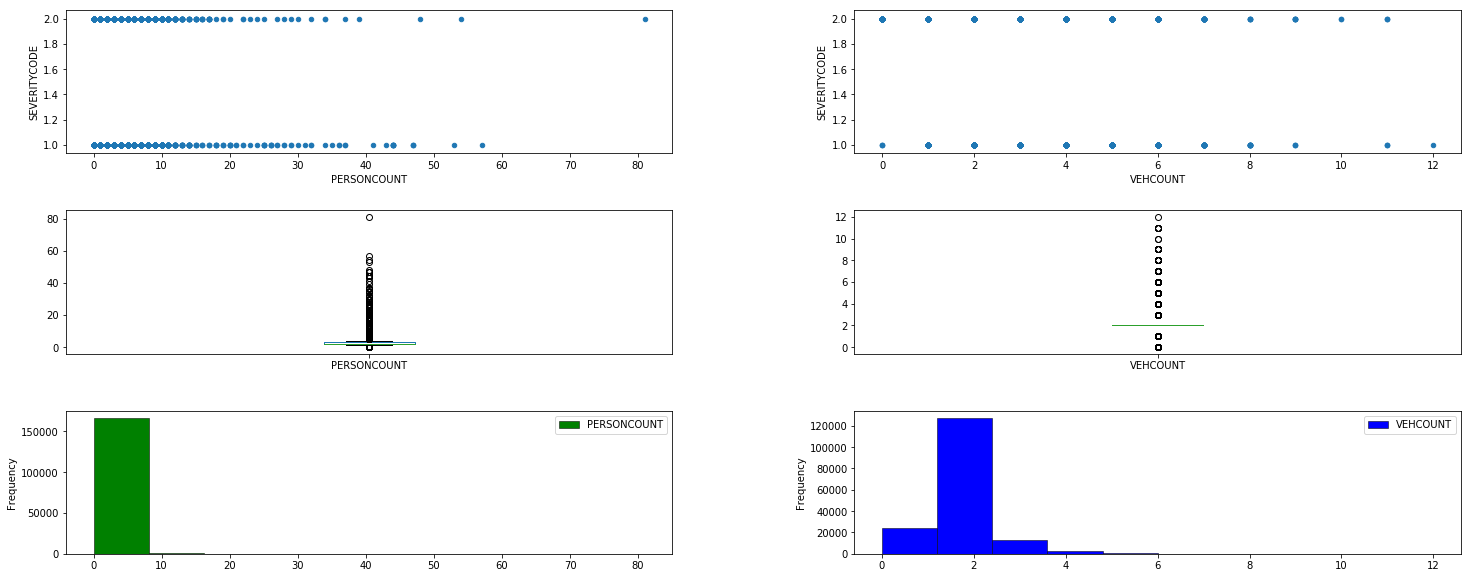

In [108]:
fig = plt.figure(figsize=(25,10))
plt.subplots_adjust(wspace=0.3,hspace=0.4)
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

df.plot.scatter(x="PERSONCOUNT",y="SEVERITYCODE",ax=ax0)
df.plot.scatter(x="VEHCOUNT",y="SEVERITYCODE",ax=ax1)
df[["PERSONCOUNT"]].plot.box(ax=ax2)
df[["VEHCOUNT"]].plot.box(ax=ax3)
df[["PERSONCOUNT"]].plot.hist(edgecolor='black', linewidth=0.5, facecolor='g',ax=ax4)
df[["VEHCOUNT"]].plot.hist(edgecolor='black', linewidth=0.5, facecolor='b',ax=ax5)           

plt.show()

#### We can see that there are outliers we should get rid of (compare boxplot and hist). We are going to drop accidents with personcount > 6 and vehcount >4

In [112]:
df = df[df["VEHCOUNT"]<5]
df = df[df["PERSONCOUNT"]<7]

### We repeat the plotting and can see much better results now

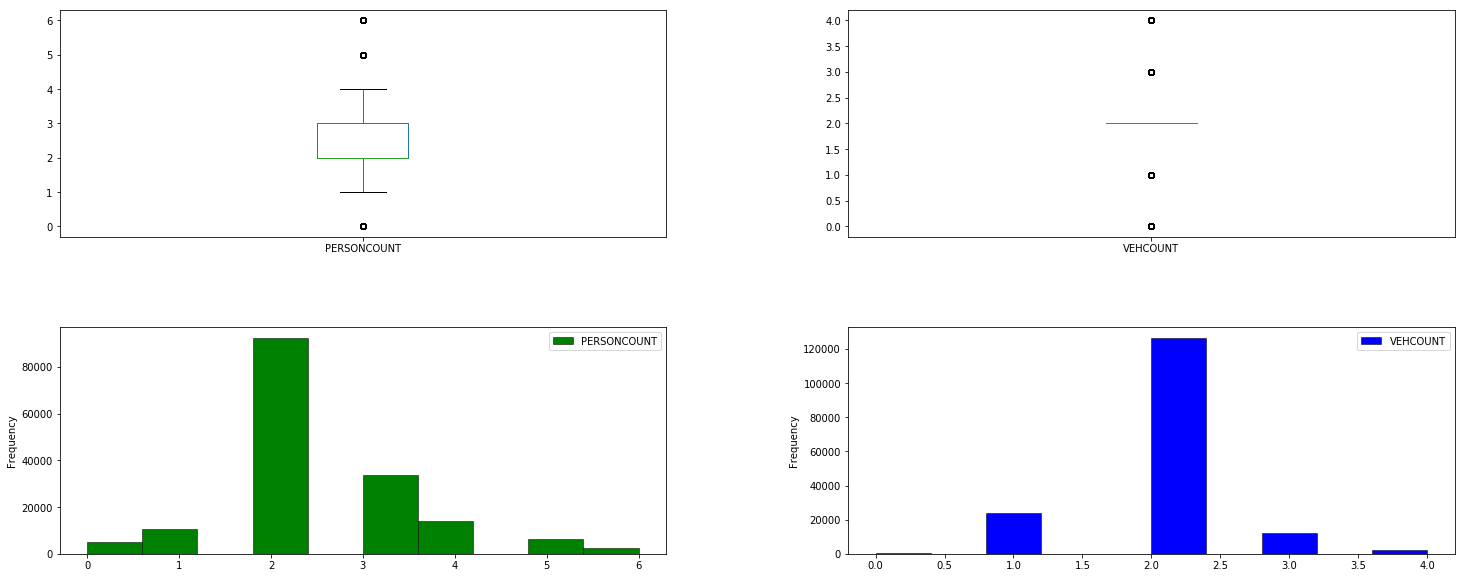

In [116]:
fig = plt.figure(figsize=(25,10))
plt.subplots_adjust(wspace=0.3,hspace=0.4)
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


df[["PERSONCOUNT"]].plot.box(ax=ax0)
df[["VEHCOUNT"]].plot.box(ax=ax1)
df[["PERSONCOUNT"]].plot.hist(edgecolor='black', linewidth=0.5, facecolor='g',ax=ax2)
df[["VEHCOUNT"]].plot.hist(edgecolor='black', linewidth=0.5, facecolor='b',ax=ax3)           

plt.show()

In [118]:
df.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,2,At Intersection (intersection related),Overcast,Bad_Conditions,Daylight
1,1,2,2,Mid-Block (not related to intersection),precipitation,Bad_Conditions,Dark - Street Lights On
2,1,4,3,Mid-Block (not related to intersection),Overcast,Good_Conditions,Daylight
3,1,3,3,Mid-Block (not related to intersection),Clear,Good_Conditions,Daylight
4,2,2,2,At Intersection (intersection related),precipitation,Bad_Conditions,Daylight


Finally we are going to check the feature Junctiontype

In [126]:
df["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              73669
At Intersection (intersection related)               58499
Mid-Block (but intersection related)                 20759
Driveway Junction                                     9852
At Intersection (but not related to intersection)     1759
Ramp Junction                                          151
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64

#### Again, we to create a leaner data set we are going to rename some features and also drop some statistically outliers

In [128]:
df["JUNCTIONTYPE"].replace(["Mid-Block (not related to intersection)","Mid-Block (but intersection related)"],value="Mid-Block",inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)",value="Intersection",inplace=True)
c = ["At Intersection (but not related to intersection)","Ramp Junction","Unknown"]
df = df[~df["JUNCTIONTYPE"].isin(c)]
df["JUNCTIONTYPE"].value_counts()

Mid-Block            94428
Intersection         58499
Driveway Junction     9852
Name: JUNCTIONTYPE, dtype: int64

In [130]:
df_clean = df

Due to the lack of computing power (in a previous try it was not possible to compute the model) we are going to limit the size of the data frame to 10.000 --> By doing this we can directly downsample the data set and fix the imbalance

In [142]:
df_s1 = df_clean[df_clean["SEVERITYCODE"]==1][0:10000]
df_s2 = df_clean[df_clean["SEVERITYCODE"]==2][0:10000]

df_ds = pd.concat([df_s1,df_s2])

In [150]:
df_ds["SEVERITYCODE"].value_counts()

2    10000
1    10000
Name: SEVERITYCODE, dtype: int64

#### As we can see, now we have a evenly balanced dataset!

In [151]:
df_ds.dtypes

SEVERITYCODE     int64
PERSONCOUNT      int64
VEHCOUNT         int64
JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

#### As a last step of the data cleaning and preprocessing we need to change the categorical features to numerical ones. Here we are using One Hot Encoding with pd.get_dummies

In [173]:
df_final = pd.get_dummies(df_ds)

In [174]:
df_final.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Intersection,JUNCTIONTYPE_Mid-Block,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_precipitation,ROADCOND_Bad_Conditions,ROADCOND_Good_Conditions,LIGHTCOND_Dark,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
1,1,2,2,0,0,1,0,0,0,1,1,0,0,1,0,0,0
2,1,4,3,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,3,3,0,0,1,1,0,0,0,0,1,0,0,0,1,0
5,1,2,2,0,1,0,1,0,0,0,0,1,0,0,0,1,0
6,1,2,2,0,1,0,0,0,0,1,1,0,0,0,0,1,0


#### As we only have two values for the Severitycode we can rename the values to (0,1) which is benefitial for the model training

In [176]:
df_final["SEVERITYCODE"].replace({1: 0, 2: 1},inplace=True)

In [177]:
df_final["SEVERITYCODE"].value_counts()

1    10000
0    10000
Name: SEVERITYCODE, dtype: int64

## Train the ML models

#### As we are dealing with a classification problem, we are going to use classification algorithms. The following models will be trained:
* knn
* decision_tree
* logistic regression

#### The models will be evaluated by:
* accuracy score
* f1_score
* log_loss (for logistic regression)

### We are going to use the same train_test_split for all 3 models in order to allow a consistent comparison

In [181]:
X = df_final.drop("SEVERITYCODE",axis=1)
X = X.values.astype("int")

In [185]:
y = df_final["SEVERITYCODE"]

In [188]:
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(X) #normalize data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### 1) knn

In [211]:
from sklearn.neighbors import KNeighborsClassifier

k_max = 10
evaluation_knn = pd.DataFrame(columns=["k","Accuracy_Score","F1_Score"])

for k in range(1,k_max+1):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc = accuracy_score(y_test,yhat)
    f1 = f1_score(y_test,yhat,average="weighted")
    
    evaluation_knn = evaluation_knn.append({'k': k,"Accuracy_Score":acc,"F1_Score":f1},ignore_index=True)
    
evaluation_knn.sort_values(by="Accuracy_Score",ascending=False).head()

,k,Accuracy_Score,F1_Score
4,5.0,0.61225,0.611384
9,10.0,0.60975,0.606648
6,7.0,0.60875,0.605882
8,9.0,0.60500,0.604183
3,4.0,0.60350,0.594858


In [196]:
evaluation_knn.sort_values(by="Accuracy_Score",ascending=False).head()

,k,Accuracy_Score,F1_Score
4,5.0,0.61225,0.611384
9,10.0,0.60975,0.606648
6,7.0,0.60875,0.605882
8,9.0,0.60500,0.604183
3,4.0,0.60350,0.594858


### 2) Decision Tree

In [204]:
from sklearn.tree import DecisionTreeClassifier

range_depth = range(1,50)
evaluation_tree = pd.DataFrame(columns=["Max_Depth","Accuracy_Score","F1_Score"])


for depth in range_depth:
    tree_sev = DecisionTreeClassifier(criterion="entropy",max_depth=depth).fit(X_train,y_train)
    pred_sev = tree_sev.predict(X_test)
    
    acc = accuracy_score(y_test,pred_sev)
    f1 = f1_score(y_test,pred_sev,average="weighted")
    
    evaluation_tree = evaluation_tree.append({'Max_Depth': depth,"Accuracy_Score":acc,"F1_Score":f1},ignore_index=True)
    
evaluation_tree.sort_values(by="Accuracy_Score",ascending=False).head()

,Max_Depth,Accuracy_Score,F1_Score
6,7.0,0.64850,0.647881
5,6.0,0.64750,0.646833
7,8.0,0.64425,0.644000
4,5.0,0.64375,0.643603
3,4.0,0.64275,0.641532


### 3) Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss as ll
c_range = [0.1,0.01,0.001]
evaluation_log = pd.DataFrame(columns=["C","Accuracy_Score","F1_Score","Log_loss"])

for c in c_range:
    lr = LogisticRegression(C=c,solver="liblinear").fit(X_train,y_train)
    yhat_lr = lr.predict(X_test)
    yhat_lr_prob = lr.predict_proba(X_test)
    
    acc = accuracy_score(y_test,yhat_lr)
    f1 = f1_score(y_test,yhat_lr,average="weighted")
    log_loss = ll(y_test,yhat_lr_prob)
    
    
    evaluation_log = evaluation_log.append({'C': c,"Accuracy_Score":acc,"F1_Score":f1,"Log_loss":log_loss},ignore_index=True)
    
evaluation_log.sort_values(by="Accuracy_Score",ascending=False).head()

,C,Accuracy_Score,F1_Score,Log_loss
2,0.001,0.62300,0.622618,0.656204
0,0.100,0.62125,0.620931,0.654979
1,0.010,0.61950,0.619010,0.654798


### Bonus: RandomForest

In [206]:
from sklearn.ensemble import RandomForestClassifier

estimators_range = range(1,100)
evaluation_forest = pd.DataFrame(columns=["N_estimators","Accuracy_Score","F1_Score"])

for n in estimators_range:
    rfc = RandomForestClassifier(n_estimators=n).fit(X_train,y_train)
    yhat_rf = rfc.predict(X_test)
    
    acc = accuracy_score(y_test,yhat_rf)
    f1 = f1_score(y_test,yhat_rf,average="weighted")
    
    evaluation_forest = evaluation_forest.append({'N_estimators': n,"Accuracy_Score":acc,"F1_Score":f1},ignore_index=True)
    
evaluation_forest.sort_values(by="Accuracy_Score",ascending=False).head()

,N_estimators,Accuracy_Score,F1_Score
54,55.0,0.64125,0.641044
4,5.0,0.64075,0.640637
97,98.0,0.64000,0.639960
30,31.0,0.64000,0.639937
66,67.0,0.63950,0.639420


## We can observe, that the Decision Tree model has reached the best accuracy_score and the highest f1_score. The best decision_tree has a max_depth of 7.

### Lets get further information for that model

In [210]:
from sklearn.metrics import classification_report
#get the best tree model
tree_sev = DecisionTreeClassifier(criterion="entropy",max_depth=7).fit(X_train,y_train)
pred_sev = tree_sev.predict(X_test)

print(classification_report(y_test,pred_sev))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1979
           1       0.64      0.69      0.66      2021

   micro avg       0.65      0.65      0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000

